[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset Shape: (14640, 15)
Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.93      0.87      1835
           0       0.65      0.52      0.58       620
           1       0.79      0.56      0.66       473

    accuracy                           0.79      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928



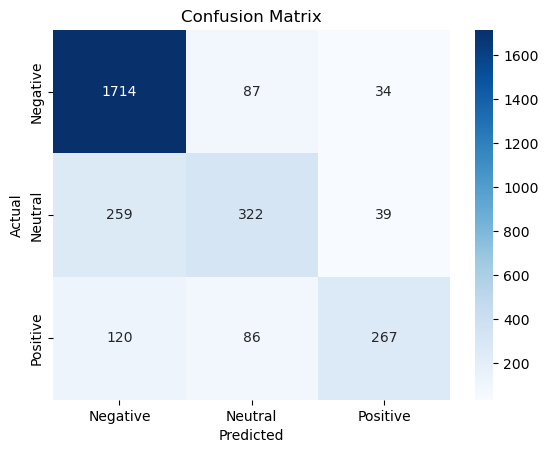

In [5]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


file_path = "tweets.csv" 
data = pd.read_csv(file_path)


print("Dataset Shape:", data.shape)
# print(data.head())

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)
data = data.dropna(subset=['cleaned_text', 'airline_sentiment'])

data['airline_sentiment'] = data['airline_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

X = data['cleaned_text']

y = data['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
